## 1. Setup and Imports

First, we'll import necessary libraries and configure our environment.

In [1]:
# Standard library imports
import sys
import warnings
from pathlib import Path

# Add project root to path for importing custom modules
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Custom modules
from src.data_preprocessing import DataLoader

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Environment setup complete")

✓ Environment setup complete


## 2. Data Loading

We'll use our custom `DataLoader` class from the `src/data_preprocessing.py` module to load the fraud transaction data. This ensures consistent data loading across all notebooks and scripts.

In [2]:
# Initialize the DataLoader
loader = DataLoader(data_dir='../data/raw', processed_dir='../data/processed')

# Load fraud data
fraud_data = loader.load_fraud_data()

print(f"\nDataset shape: {fraud_data.shape}")
print(f"Memory usage: {fraud_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✓ Loaded fraud data: 151112 rows, 11 columns
  Fraud cases: 14151
  Legitimate cases: 136961

Dataset shape: (151112, 11)
Memory usage: 63.81 MB


## 3. Initial Data Inspection

Let's examine the structure, data types, and first few rows of our dataset to understand what we're working with.

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
fraud_data.head()

First 5 rows of the dataset:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.80,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.87,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.45,0


In [4]:
# Display dataset information
print("Dataset Information:")
fraud_data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [5]:
# Get detailed information using our custom method
data_info = loader.get_data_info(fraud_data)

print("\nDetailed Data Information:")
print(f"Shape: {data_info['shape']}")
print(f"\nColumns: {data_info['columns']}")
print(f"\nData Types:")
for col, dtype in data_info['dtypes'].items():
    print(f"  {col}: {dtype}")
print(f"\nMemory Usage: {data_info['memory_usage']:.2f} MB")


Detailed Data Information:
Shape: (151112, 11)

Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

Data Types:
  user_id: int64
  signup_time: object
  purchase_time: object
  purchase_value: int64
  device_id: object
  source: object
  browser: object
  sex: object
  age: int64
  ip_address: float64
  class: int64

Memory Usage: 63.81 MB


## 4. Basic Statistical Summary

Generate descriptive statistics for all features to understand distributions, ranges, and central tendencies.

In [6]:
# Statistical summary for numerical features
print("Numerical Features Summary:")
fraud_data.describe()

Numerical Features Summary:


,user_id,purchase_value,age,ip_address,class
count,151112.00,151112.00,151112.00,151112.00,151112.00
mean,200171.04,36.94,33.14,2152145330.96,0.09
std,115369.29,18.32,8.62,1248497030.10,0.29
min,2.00,9.00,18.00,52093.50,0.00
25%,100642.50,22.00,27.00,1085933882.53,0.00
50%,199958.00,35.00,33.00,2154770162.41,0.00
75%,300054.00,49.00,39.00,3243257679.72,0.00
max,400000.00,154.00,76.00,4294850499.68,1.00


In [7]:
# Statistical summary for categorical features
print("Categorical Features Summary:")
fraud_data.describe(include=['object'])

Categorical Features Summary:


,signup_time,purchase_time,device_id,source,browser,sex
count,151112,151112,151112,151112,151112,151112
unique,151112,150679,137956,3,5,2
top,2015-06-10 07:02:20,2015-07-17 23:22:55,NGQCKIADMZORL,SEO,Chrome,M
freq,1,3,20,60615,61432,88293


## 5. Data Quality Assessment

Check for missing values, duplicates, and other data quality issues that need to be addressed.

In [8]:
# Check for missing values
print("Missing Values:")
missing_values = fraud_data.isnull().sum()
missing_percent = (missing_values / len(fraud_data)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ No missing values found!")

Missing Values:
✓ No missing values found!


In [9]:
# Check for duplicate rows
duplicate_count = fraud_data.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count / len(fraud_data)) * 100:.2f}%")
else:
    print("✓ No duplicate rows found!")

Duplicate rows: 0
✓ No duplicate rows found!


## 6. Target Variable Analysis

Examine the distribution of our target variable (fraud class) to understand class imbalance.

In [10]:
# Class distribution
print("Fraud Class Distribution:")
class_counts = fraud_data['class'].value_counts()
class_percentages = fraud_data['class'].value_counts(normalize=True) * 100

class_df = pd.DataFrame({
    'Class': ['Legitimate (0)', 'Fraud (1)'],
    'Count': class_counts.values,
    'Percentage': class_percentages.values
})
print(class_df.to_string(index=False))

# Calculate imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\nImbalance Ratio (Legitimate:Fraud): {imbalance_ratio:.2f}:1")

Fraud Class Distribution:
         Class  Count  Percentage
Legitimate (0) 136961       90.64
     Fraud (1)  14151        9.36

Imbalance Ratio (Legitimate:Fraud): 9.68:1


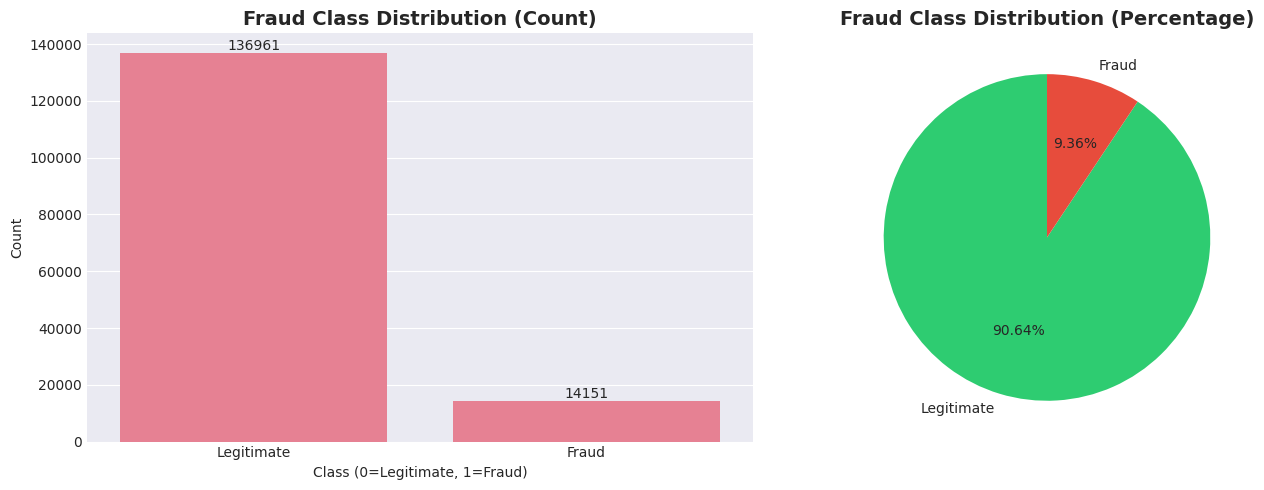

✓ Visualization saved to reports/images/fraud_class_distribution.png


In [11]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=fraud_data, x='class', ax=axes[0])
axes[0].set_title('Fraud Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Legitimate, 1=Fraud)')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Legitimate', 'Fraud'])

# Add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
axes[1].pie(class_counts.values, labels=['Legitimate', 'Fraud'], autopct='%1.2f%%',
           startangle=90, colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Fraud Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/images/fraud_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved to reports/images/fraud_class_distribution.png")

## 7. Key Features Overview

Let's examine the unique values and distributions of key categorical and numerical features.

In [12]:
# Unique values in categorical columns
categorical_cols = ['source', 'browser', 'sex']

print("Unique Values in Categorical Features:")
for col in categorical_cols:
    unique_count = fraud_data[col].nunique()
    unique_values = fraud_data[col].unique()[:10]  # Show first 10
    print(f"\n{col}:")
    print(f"  Unique count: {unique_count}")
    print(f"  Sample values: {unique_values}")
    print(f"  Value counts:")
    print(fraud_data[col].value_counts().to_string())

Unique Values in Categorical Features:

source:
  Unique count: 3
  Sample values: ['SEO' 'Ads' 'Direct']
  Value counts:
source
SEO       60615
Ads       59881
Direct    30616

browser:
  Unique count: 5
  Sample values: ['Chrome' 'Opera' 'Safari' 'IE' 'FireFox']
  Value counts:
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676

sex:
  Unique count: 2
  Sample values: ['M' 'F']
  Value counts:
sex
M    88293
F    62819


In [13]:
# Analyze purchase_value distribution
print("Purchase Value Statistics:")
print(fraud_data['purchase_value'].describe())
print(f"\nZero purchase values: {(fraud_data['purchase_value'] == 0).sum()}")
print(f"Negative purchase values: {(fraud_data['purchase_value'] < 0).sum()}")

Purchase Value Statistics:
count   151112.00
mean        36.94
std         18.32
min          9.00
25%         22.00
50%         35.00
75%         49.00
max        154.00
Name: purchase_value, dtype: float64

Zero purchase values: 0
Negative purchase values: 0


In [14]:
# Analyze age distribution
print("Age Statistics:")
print(fraud_data['age'].describe())
print(f"\nMinimum age: {fraud_data['age'].min()}")
print(f"Maximum age: {fraud_data['age'].max()}")
print(f"Potential outliers (age < 18 or age > 100): {((fraud_data['age'] < 18) | (fraud_data['age'] > 100)).sum()}")

Age Statistics:
count   151112.00
mean        33.14
std          8.62
min         18.00
25%         27.00
50%         33.00
75%         39.00
max         76.00
Name: age, dtype: float64

Minimum age: 18
Maximum age: 76
Potential outliers (age < 18 or age > 100): 0


## 8. Summary and Next Steps

### Key Findings:

1. **Dataset Size**: The fraud data contains transaction records with multiple features
2. **Data Quality**: Assessment of missing values and duplicates has been completed
3. **Class Imbalance**: The dataset shows imbalance between fraud and legitimate transactions
4. **Feature Types**: Mix of numerical (purchase_value, age) and categorical (source, browser, sex) features

### Next Steps:

1. **Data Cleaning**: Handle any identified data quality issues (Step 1.2)
2. **Detailed EDA**: Perform univariate and bivariate analysis (Step 1.3)
3. **IP Mapping**: Map IP addresses to countries for geolocation analysis (Step 1.5)
4. **Feature Engineering**: Create temporal and behavioral features (Step 1.6)
5. **Class Imbalance**: Apply appropriate sampling techniques (Step 1.7)

In [15]:
# Save basic summary for reference
summary_stats = fraud_data.describe(include='all').T
summary_stats.to_csv('../reports/fraud_data_summary_stats.csv')
print("✓ Summary statistics saved to reports/fraud_data_summary_stats.csv")

✓ Summary statistics saved to reports/fraud_data_summary_stats.csv
